<a href="https://colab.research.google.com/github/vkekd25/Sc2_Project/blob/main/Sc2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Olist's Business Model**

**Olist는 전자 상거래 부문에서 운영되는 브라질 백화점(마켓플레이스)이지만 전자 상거래 자체는 아닙니다(그녀가 말했듯이). 2015년부터 SaaS(Software as a Service) 기술 회사로 운영하고 있습니다. 모든 규모(및 대부분의 부문)의 상점 주인에게 시장 솔루션(전자 상거래 부문)을 제공하여 온라인 존재 여부에 관계없이 매출 증대**

#**Olist Solution**
**Olist의 솔루션은 소프트웨어, 주요 시장과의 계약 및 평판 공유의 세 가지 측면으로 구성됩니다. 아래 다이어그램은 Olist가 시장, 소비자(포르투갈어: consumidores) 및 소매업체(포르투갈어: varejistas)를 연결하는 방법을 보여줍니다.**

**Olist은(는) 시장 내의 대형 백화점입니다.  
Olist는 브라질의 주요 전자 상거래와 연결되어 있습니다.  
Olist 제품을 구매하지 않습니다.  
Olist 제품을 재고로 보관하지 않습니다.  
Olist 매장에서 제공되는 제품의 배송을 수행하지 않습니다.  
모든 제품은 Olist를 통해 판매하는 수천 명의 상점 주인(Olist*에 등록됨)이 판매 및 배송합니다.  
Olist의 강점은 실제 제품을 판매하는 모든 참여 상점 주인의 연합에 있습니다.  
참여 상점 주인은 제품을 분리, 포장 및 물류 운영자에게 가져갈 책임이 있습니다.**

**Customer ID: 고객 Id      
Customer Unique ID: 고객 고유 Id    
Customer Zip Code prefix: 고객 Zip Code  
Customer City: 고객 사는 도시  
Customer State: 고객 사는 주  
Geolocation Zip Code prefix: 지리적 위치 우편번호  
Geolocation Lat: 지리적 위치 위도   
Geolocation Lng: 지리적 위치 경도  
Geolocation City: 지리적 위치 도시  
Geolocation State: 지리적 위치 주  
Order ID: 주문 ID  
Order Item ID: 주문 아이템 ID  
Seller ID: 판매자 ID  
Shipping limit date: 배송 제한 날짜    
Price:  가격 
Freight Value: 운임 가치     
Payment Sequential:  결제 순차   
Payment Type: 지불 유형  
Payment Installments 분할 납부    
Payment Value: 지불 가치   
Product ID: 제품 ID  
Product Category name: 제품 카테고리 이름    
Product Name length: 상품명 길이    
Product Description length: 상품 묘사 길이
Product Photos (quantity): 제품 사진(수량)    
Product Weight (grams): 제품 무게(그램)  
Product Length (cm): 제품 길이(cm)    
Product Height (cm): 제품 높이(cm)    
Product Width (cm): 제품 너비(cm)    
Review ID: 리뷰 ID    
Review Score: 리뷰 점수    
Review Comment title: 리뷰 댓글 제목    
Review Comment message: 리뷰 댓글 메시지  
Review Creation date: 리뷰 작성 날짜  
Review Answer timestamp: 리뷰 답변 타임스탬프  
Seller ID: 판매자 ID  
Seller Zip Code: 판매자 우편번호  
Seller City: 판매자 도시  
Seller State: 판매자 주**

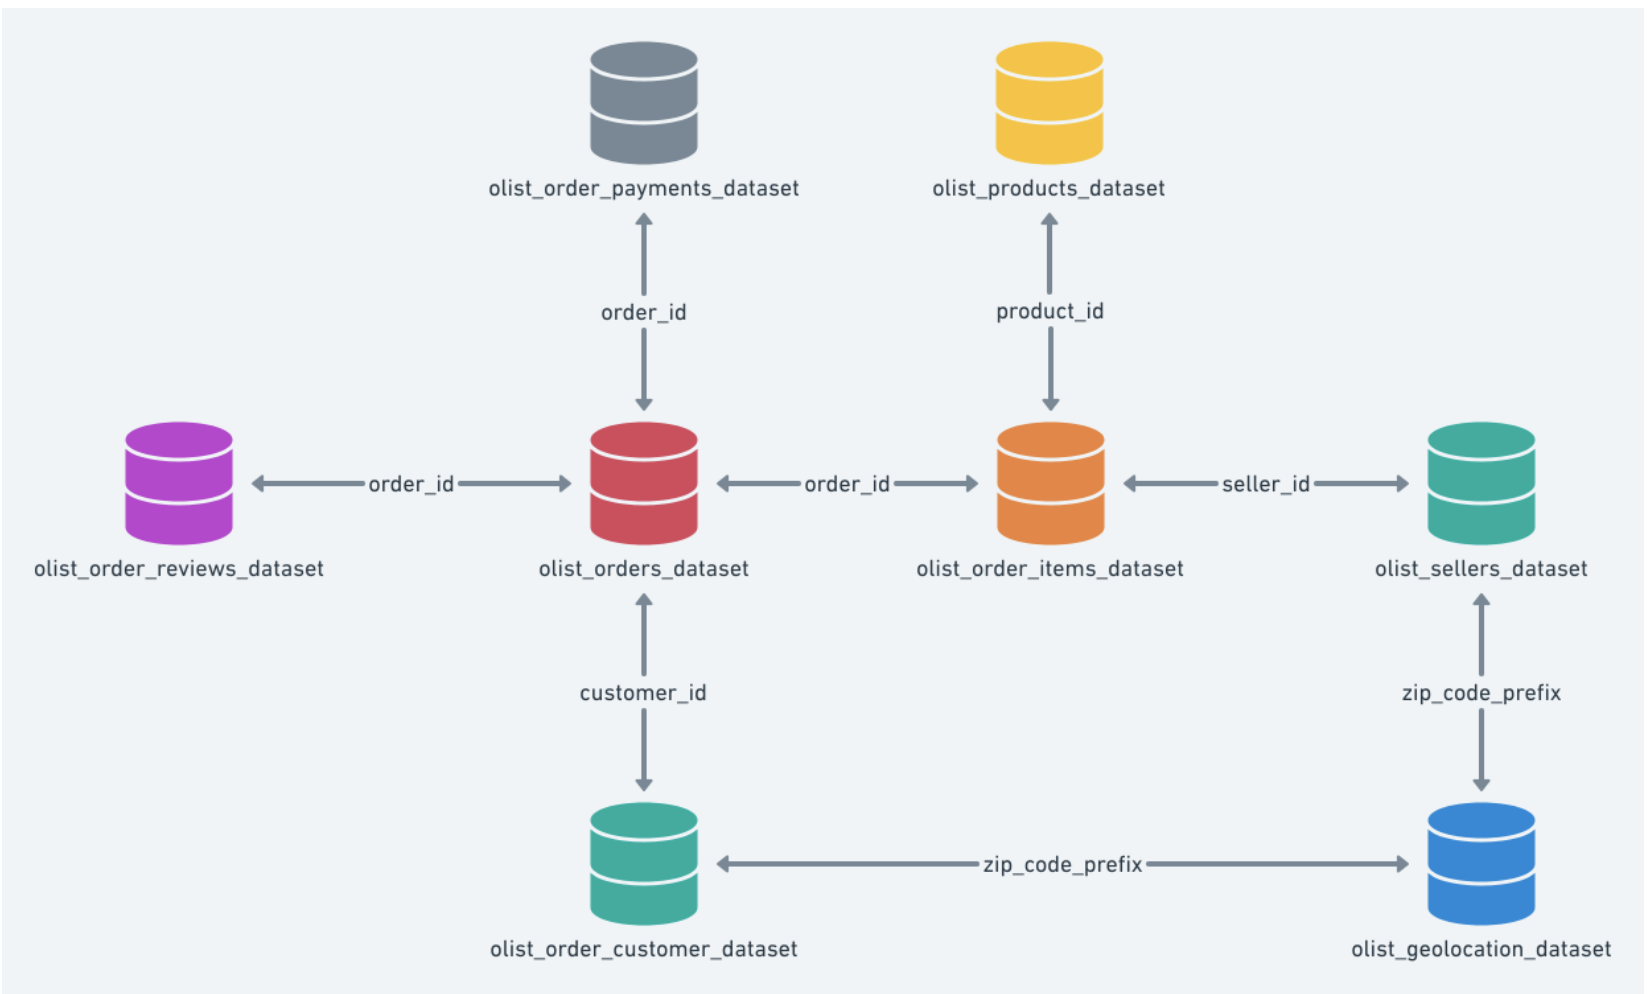

In [1]:
pip install haversine

In [2]:
# https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/code 해당 케글 사이트
import os
import pandas as pd

filenames = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_items_dataset.csv',
             'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv',
             'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']

customers = pd.read_csv(filenames[0])#data.csv불러오기
geolocation = pd.read_csv(filenames[1])
items = pd.read_csv(filenames[2])
payments = pd.read_csv(filenames[3])
reviews = pd.read_csv(filenames[4])
orders = pd.read_csv(filenames[5])
products = pd.read_csv(filenames[6])
sellers = pd.read_csv(filenames[7])
product_category = pd.read_csv(filenames[8])

**Wrangling**

In [3]:
# order_id merge전 중복행 제거! 
items = items.drop_duplicates('order_id')
payments = payments.drop_duplicates('order_id')
reviews = reviews.drop_duplicates('order_id')
orders = orders.drop_duplicates('order_id')

In [4]:
# merge를 이용하여 데이터 합치기
orders = orders.merge(customers, on = 'customer_id')
orders = orders.merge(reviews, on = 'order_id')
orders = orders.merge(payments, on = 'order_id')
items = items.merge(products, on = 'product_id')
items = items.merge(sellers, on = 'seller_id')
orders = orders.merge(items, on = 'order_id')

In [5]:
import numpy as np

# 상표이름 스페인어에서 영어로 만드는 함수
category_list = np.array(product_category)
def spa_eng(x):
  for i in category_list:
    x = x.replace(i[0], i[1])
  return x
orders['product_category_name'] = spa_eng(orders.product_category_name) # Spainish -> English

In [6]:
geolocation = geolocation.drop_duplicates(['geolocation_zip_code_prefix', 'geolocation_state'])
orders = orders.merge(geolocation, left_on = ['customer_zip_code_prefix', 'customer_city', 'customer_state'], 
                      right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
orders = orders.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], axis = 1)

orders = orders.merge(geolocation, left_on = ['seller_zip_code_prefix', 'seller_city', 'seller_state'],
                      right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
orders = orders.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], axis = 1)

In [7]:
def tofloat(x):
  return float(x)
orders['geolocation_lat_x'] = orders['geolocation_lat_x'].apply(tofloat)
orders['geolocation_lng_x'] = orders['geolocation_lng_x'].apply(tofloat)
orders['geolocation_lat_y'] = orders['geolocation_lat_y'].apply(tofloat)
orders['geolocation_lng_y'] = orders['geolocation_lng_y'].apply(tofloat)

In [8]:
from haversine import haversine, Unit

distance_compare_list = []
customer_distance = []
seller_distance = []

for i in range(orders.shape[0]):
  customer = (orders['geolocation_lat_x'][i], orders['geolocation_lng_x'][i])
  seller = (orders['geolocation_lat_y'][i], orders['geolocation_lng_y'][i])
  result = haversine(customer, seller, unit = 'km')

  distance_compare_list.append(result)
  customer_distance.append(customer)
  seller_distance.append(seller)

orders['distance_compare'] = pd.DataFrame({'distance_compare' : distance_compare_list})

In [9]:
# 소비자, 판매자 위도, 경도 열 제거
orders = orders.drop(['geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y',
       'geolocation_lng_y'], axis = 1)

In [10]:
orders.distance_compare[:5]

0     18.063862
1    475.873906
2    116.322481
3     29.901922
4    423.003256
Name: distance_compare, dtype: float64

In [11]:
# 구매자와 판매자 최소거리
# distance_compare_list = []
# distance_min_list = []

# for i in range(bed_bath_table.shape[0]):
#   for j in range(bed_bath_table.shape[0]):
#     customer = (bed_bath_table['geolocation_lat_x'].iloc[i], bed_bath_table['geolocation_lng_x'].iloc[i])
#     seller = (bed_bath_table['geolocation_lat_y'].iloc[j], bed_bath_table['geolocation_lng_y'].iloc[j])
#     result = haversine(customer, seller, unit = 'km')

#     distance_compare_list.append(result)
#     if np.array(result) == np.array(distance_compare_list).min():
#       location = j
#   distance_min_list.append(bed_bath_table.iloc[location]['seller_id'])

In [12]:
# bed_bath_table['new_seller_id'] = pd.DataFrame({'new_seller_id' : distance_min_list})

#**데이터 선정 이유 및 문제정의**  

**해결하고자 하는 문제가 적용되는 시나리오**  
Review Score는 구매자가 상품을 구매하기전에 고려하는 아주 중요한 상황

**문제 해결의 필요성에 대해 명확히 제시**   
그러므로 판매자입장에서 Review Score 분석하는것이 그 무엇 보다 중요하다.

**데이터셋에서 해결하고자 하는 문제 정의에 적절한 타겟을 선정**  
타겟 Review Scores는 1-5으로 나누어져있지만 4-5점은 1로 1-3점은 0으로 긍정적/부정적인 의미로 분류로 나뉘었다.

**타겟을 잘 설명할 수 있을 만한 특성에 대한 가설을 설정**  
어떤 조건들이 Review Score에 영향을 줄까?

**1.** 주문한 시간과 상품도착한 시간이 리뷰점수에 영향을줄까?  
**2.** 상품의 종류에 따라 리뷰점수가 다를까?  
**3.** 운임가격에 따라 리뷰점수가 달라질까?  
**4.** 상품의 크기에 따라 리뷰점수가 달라질까?  
**5.** 원가와 상품가격의 차에따라 리뷰점수가 달라질까?  
**6.** 제품 도착날짜와 주문날짜의 차이가 리뷰 점수에 영향을 줄까?  
**7.** 리뷰작성날짜와 리뷰답변날짜의 차이가 리뷰 점수에 영향을 줄까?
**8.** 제품 승인날짜와 제품 운반날짜의 차이가 리뷰 점수에 영향을 줄까?  
**9.** 상품명 길이가 리뷰 점수에 영향을 줄까?  
**10.** 상품묘사한 글귀 갯수가 리뷰 점수에 영향을 줄까?



In [13]:
def review_like_unlike(x):
  if x > 3:
    x = 1
  else:
    x = 0
  return x
orders.review_score = orders.review_score.apply(review_like_unlike)

#**데이터 전처리, EDA, 시각화**  

In [14]:
# comment, title 제외 데이터프레임 분류, order_item_id제거(의미없는 데이터)
df = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score',
       'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare']].copy()

**머신러닝에 적합한 형태로 테이터 타입 변경**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81502 entries, 0 to 81501
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       81502 non-null  object 
 1   customer_id                    81502 non-null  object 
 2   order_status                   81502 non-null  object 
 3   order_purchase_timestamp       81502 non-null  object 
 4   order_approved_at              81489 non-null  object 
 5   order_delivered_carrier_date   80679 non-null  object 
 6   order_delivered_customer_date  79704 non-null  object 
 7   order_estimated_delivery_date  81502 non-null  object 
 8   customer_unique_id             81502 non-null  object 
 9   customer_zip_code_prefix       81502 non-null  int64  
 10  customer_city                  81502 non-null  object 
 11  customer_state                 81502 non-null  object 
 12  review_id                      81502 non-null 

In [16]:
# 날짜 컬럼 전처리에 용이하게 datetime 타입으로 변경
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [17]:
df.shape

(81502, 37)

**특성과 타겟의 상관관계**

In [18]:
df.corr()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,distance_compare
customer_zip_code_prefix,1.000000,-0.010314,-0.005323,0.051866,0.054742,0.040558,0.220388,0.011628,0.025091,0.020436,0.003312,0.007346,0.007268,-0.008989,0.076065,0.482064
review_score,-0.010314,1.000000,0.001152,-0.033385,-0.037586,-0.005102,-0.033075,-0.005623,0.016180,0.013772,-0.026892,-0.020158,-0.019450,-0.014106,0.028928,-0.048210
payment_sequential,-0.005323,0.001152,1.000000,-0.058405,-0.040125,0.004009,0.011651,0.002770,-0.003207,-0.003752,0.009301,0.010138,0.009332,0.009462,-0.002154,0.001453
payment_installments,0.051866,-0.033385,-0.058405,1.000000,0.315405,0.306687,0.203221,0.020405,0.040637,-0.000880,0.192153,0.123404,0.125725,0.145104,0.040336,0.087280
payment_value,0.054742,-0.037586,-0.040125,0.315405,1.000000,0.902430,0.454494,0.006643,0.180238,0.024224,0.354025,0.156262,0.234265,0.173068,0.090443,0.103267
price,0.040558,-0.005102,0.004009,0.306687,0.902430,1.000000,0.423658,0.008749,0.198229,0.042099,0.334997,0.140656,0.217335,0.164761,0.088026,0.082350
freight_value,0.220388,-0.033075,0.011651,0.203221,0.454494,0.423658,1.000000,0.021991,0.091532,0.021496,0.622705,0.316130,0.391308,0.325761,0.158226,0.386571
product_name_lenght,0.011628,-0.005623,0.002770,0.020405,0.006643,0.008749,0.021991,1.000000,0.085097,0.138025,0.025409,0.055606,-0.021650,0.068881,-0.050872,0.015104
product_description_lenght,0.025091,0.016180,-0.003207,0.040637,0.180238,0.198229,0.091532,0.085097,1.000000,0.112538,0.054263,-0.002185,0.072218,-0.076368,0.061227,0.039689
product_photos_qty,0.020436,0.013772,-0.003752,-0.000880,0.024224,0.042099,0.021496,0.138025,0.112538,1.000000,0.026778,0.042470,-0.033018,0.006199,-0.058803,0.016976


**타겟 분포**

In [19]:
# 타겟 분포비율 확인
df['review_score'].value_counts(normalize = True)

1    0.769687
0    0.230313
Name: review_score, dtype: float64

**특성 분포**

In [20]:
df['order_status'].value_counts(normalize = True)

delivered      0.977988
shipped        0.011190
canceled       0.004564
invoiced       0.003264
processing     0.002932
unavailable    0.000049
approved       0.000012
Name: order_status, dtype: float64

In [21]:
df['order_status'].value_counts(normalize = True)

delivered      0.977988
shipped        0.011190
canceled       0.004564
invoiced       0.003264
processing     0.002932
unavailable    0.000049
approved       0.000012
Name: order_status, dtype: float64

In [22]:
df['customer_city'].value_counts(normalize = True)

sao paulo               0.142463
rio de janeiro          0.074305
belo horizonte          0.030306
curitiba                0.016834
brasilia                0.015816
                          ...   
coreau                  0.000012
guia lopes da laguna    0.000012
abaira                  0.000012
purilandia              0.000012
livramento              0.000012
Name: customer_city, Length: 3674, dtype: float64

In [23]:
df['customer_state'].value_counts(normalize = True)

SP    0.408824
RJ    0.131960
MG    0.123678
RS    0.057373
PR    0.053275
SC    0.035913
BA    0.035030
ES    0.021018
GO    0.019558
PE    0.017693
DF    0.015828
CE    0.014282
PA    0.009975
MT    0.008871
MA    0.007423
MS    0.007313
PB    0.005055
PI    0.005031
RN    0.004957
AL    0.004159
SE    0.003681
TO    0.002908
RO    0.002601
AM    0.001558
AC    0.000859
AP    0.000699
RR    0.000479
Name: customer_state, dtype: float64

In [24]:
df['payment_sequential'].value_counts(normalize = True)

1     0.983632
2     0.013509
3     0.001595
4     0.000515
5     0.000233
6     0.000172
7     0.000110
8     0.000086
10    0.000061
11    0.000025
9     0.000012
19    0.000012
15    0.000012
14    0.000012
17    0.000012
Name: payment_sequential, dtype: float64

In [25]:
df['payment_installments'].value_counts(normalize = True)

1     0.483043
2     0.124390
3     0.105139
4     0.071581
10    0.053128
5     0.052686
8     0.044060
6     0.039827
7     0.016110
9     0.006478
12    0.001325
15    0.000785
18    0.000294
11    0.000221
13    0.000196
20    0.000196
24    0.000184
14    0.000123
17    0.000086
16    0.000061
21    0.000037
0     0.000025
23    0.000012
22    0.000012
Name: payment_installments, dtype: float64

In [26]:
df['product_category_name'].value_counts(normalize = True)

bed_bath_table               0.100394
health_beauty                0.084996
sports_leisure               0.078107
computers_accessories        0.072763
furniture_decor              0.066896
                               ...   
la_cuisine                   0.000137
cds_dvds_musicals            0.000125
fashion_childrens_clothes    0.000100
pc_gamer                     0.000087
security_and_services        0.000025
Name: product_category_name, Length: 73, dtype: float64

In [27]:
df['seller_city'].value_counts(normalize = True)

sao paulo          0.226743
ibitinga           0.073507
curitiba           0.030036
santo andre        0.027423
belo horizonte     0.026183
                     ...   
araquari           0.000012
medianeira         0.000012
orlandia           0.000012
ivoti              0.000012
abadia de goias    0.000012
Name: seller_city, Length: 511, dtype: float64

In [28]:
df['seller_state'].value_counts(normalize = True)

SP    0.698228
MG    0.088844
PR    0.085458
RJ    0.039410
SC    0.038821
RS    0.021766
BA    0.006049
DF    0.005374
PE    0.004172
GO    0.003963
ES    0.003558
MT    0.001583
CE    0.000969
RN    0.000589
MS    0.000491
PB    0.000393
PI    0.000147
SE    0.000086
RO    0.000049
AM    0.000037
AC    0.000012
Name: seller_state, dtype: float64

**여러 테크닉을 사용해 결측치를 적절히 처리**

In [29]:
#결측치 확인!
orders.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   13
order_delivered_carrier_date       823
order_delivered_customer_date     1798
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             72020
review_comment_message           47522
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [30]:
# 결측치 컬럼 review_comment_title, review_comment_message 제외하고 drop!
df = df.dropna(axis = 0, subset = ['order_approved_at', 
                                  'order_delivered_carrier_date', 
                                  'order_delivered_customer_date'])
df['product_category_name'] = df['product_category_name'].fillna(df['product_category_name'].mode()[0])
df['product_name_lenght'] = df['product_name_lenght'].fillna(df['product_name_lenght'].mode()[0])
df['product_description_lenght'] = df['product_description_lenght'].fillna(df['product_description_lenght'].mode()[0])
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].mode()[0])                                
df['product_weight_g'] = df['product_weight_g'].fillna(df['product_weight_g'].median())
df['product_length_cm'] = df['product_length_cm'].fillna(df['product_length_cm'].median())
df['product_height_cm'] = df['product_height_cm'].fillna(df['product_height_cm'].median())
df['product_width_cm'] = df['product_width_cm'].fillna(df['product_width_cm'].median())

# 'product_category_name',
# 'product_name_lenght',
# 'product_description_lenght',
# 'product_photos_qty',
# 'product_weight_g',
# 'product_length_cm',
# 'product_height_cm',
# 'product_width_cm'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#결측치제거 확인!
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty  

**본인의 전처리 과정**

In [32]:
df['order_deliver_diff'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['order_estimated_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['review_diff'] = df['review_answer_timestamp'] - df['review_creation_date']
df['carrier_diff'] = df['order_delivered_carrier_date'] - df['order_approved_at']

In [33]:
# + 1days
def order_days(x):
  return x.days + 1

In [34]:
df['order_deliver_diff'] = df['order_deliver_diff'].apply(order_days)
df['order_estimated_diff'] = df['order_estimated_diff'].apply(order_days)
df['review_diff'] = df['review_diff'].apply(order_days)
df['carrier_diff'] = df['carrier_diff'].apply(order_days)

In [35]:
df['margin'] = round(df['payment_value'] - df['price'], 2) # 지불한 값 - 제품 원가
df['product_volume_cm'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm'] # 길이 * 너비 * 높이 = 부피

In [36]:
# 원가보다 높은 가격이 이상해서 이상치 제거
df = df[df.margin > 0]
df = df.reset_index()
df = df.drop('index', axis = 1)

**전처리 과정에 대해 근거를 들어 설명:**   

**판매자와 구매자의 위도/경도를 통해 구한 거리와 리뷰 점수와 연관이 있을거같아서 전처리하였습니다.**

**고객 제품 도착날짜 - 고객 구매날짜의 차이는 리뷰 점수와 연관이 있을거같아서 전처리하였습니다.**

**제품 예상도착 날짜 - 제품 실제도착 날짜의 차이는 리뷰 점수와 연관이 있을거같아서 전처리하였습니다.** 

**리뷰 답변날짜 - 리뷰 작성날짜의 차이는 리뷰 점수와 연관이 있을거같아서 전처리하였습니다.**

**판매처에서 제품 운송한 날짜 - 제품 주문 승인 날짜의 차이는 리뷰 점수와 연관이 있을거같아서 전처리하였습니다.**

**피쳐의 분포확인(이상치확인)**

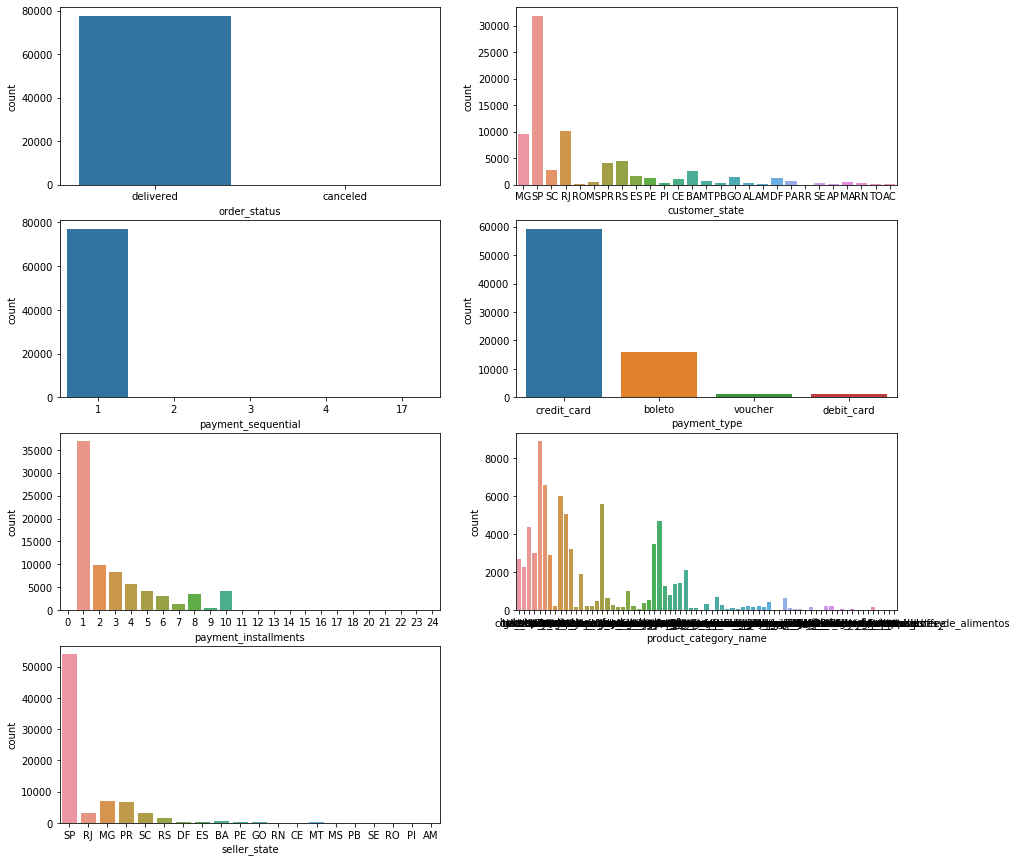

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['order_status', 'customer_state', 
            'payment_sequential','payment_type', 'payment_installments',
            'product_category_name', 'seller_state']
plt.figure(figsize = (15, 15))

for i in range(len(features)):
    ax = plt.subplot(4, 2, i + 1)
    sns.countplot(x = features[i], data = df)
plt.show()

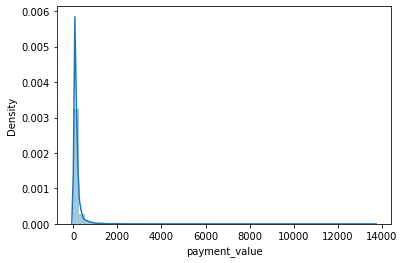

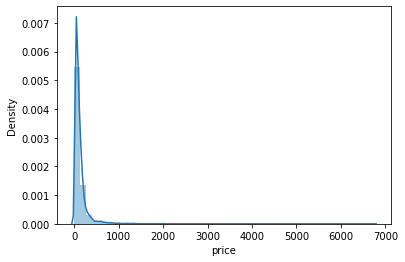

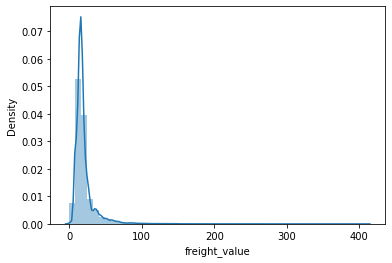

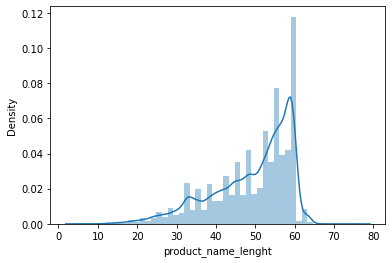

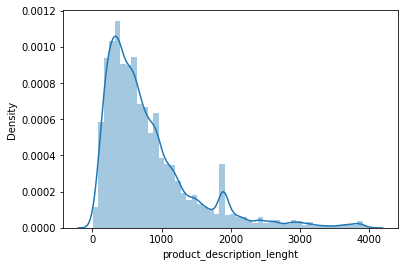

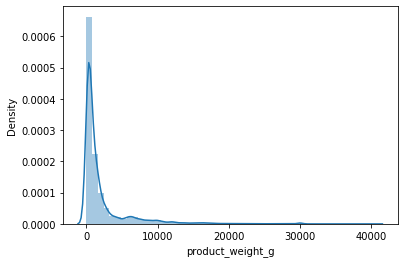

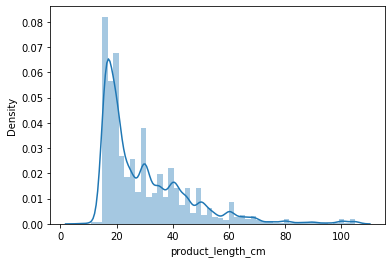

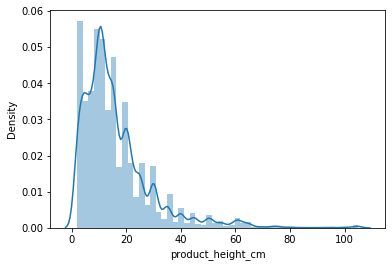

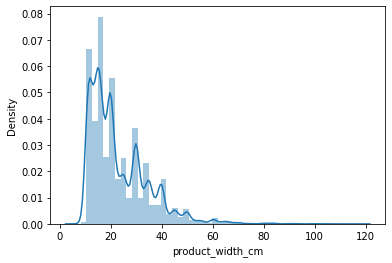

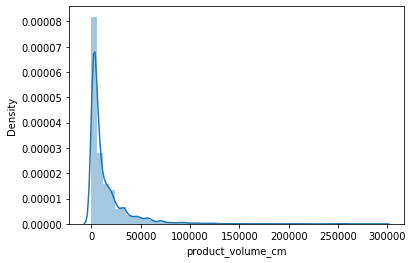

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = ['payment_value', 'price', 'freight_value', 'product_name_lenght', 
            'product_description_lenght','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_volume_cm']

for i in features:            
  sns.distplot(df[i]);
  plt.show()

**이상치 제거**

In [39]:
df = df[df['payment_value'] <= np.percentile(df['payment_value'], 99.5)]
df = df[df['price'] <= np.percentile(df['price'], 99.5)]
df = df[df['freight_value'] <= np.percentile(df['freight_value'], 99.5)]
df = df[df['product_weight_g'] <= np.percentile(df['product_weight_g'], 99.5)]
# df = df[df['product_length_cm'] <= np.percentile(df['product_length_cm'], 99.5)] 추가시 XGB성능이 떨어짐
# df = df[df['product_height_cm'] <= np.percentile(df['product_height_cm'], 99.5)]
# df = df[df['product_width_cm'] <= np.percentile(df['product_width_cm'], 99.5)]
df = df[df['product_volume_cm'] <= np.percentile(df['product_volume_cm'], 99.5)]

In [40]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty  

In [41]:
df.shape

(75622, 43)

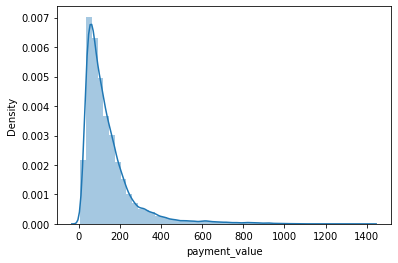

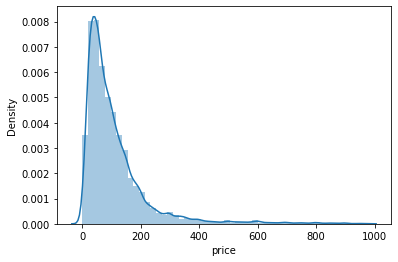

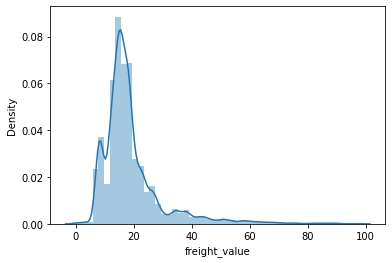

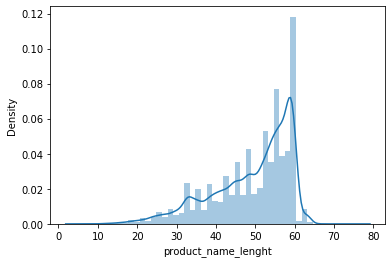

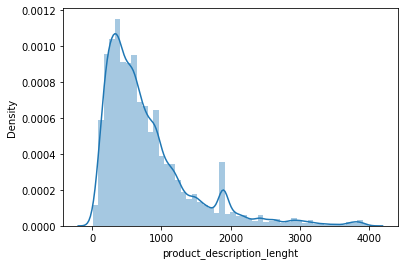

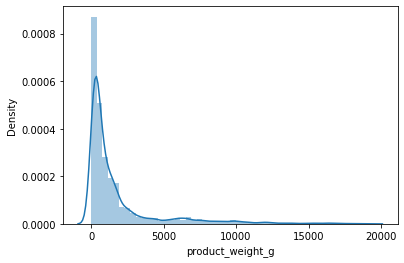

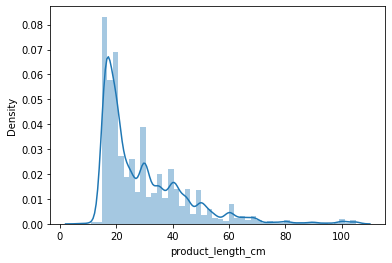

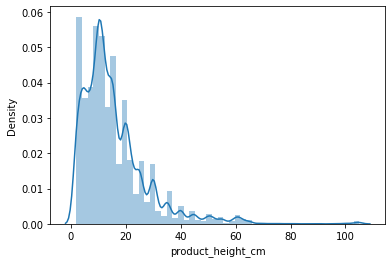

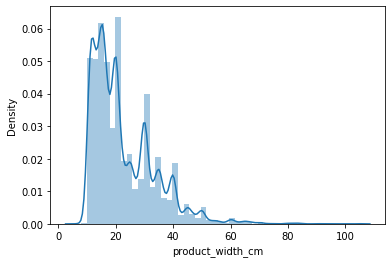

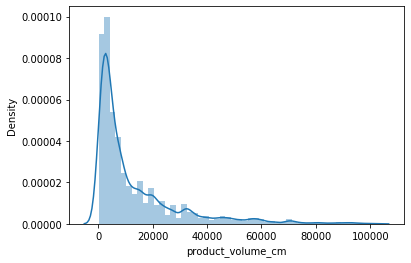

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = ['payment_value', 'price', 'freight_value', 'product_name_lenght', 
            'product_description_lenght','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_volume_cm']

for i in features:            
  sns.distplot(df[i]);
  plt.show()

In [43]:
df_product_category_name = df.groupby('product_category_name').review_score.value_counts(normalize = True)[:20]

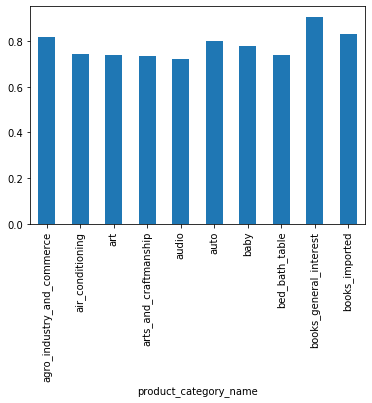

In [44]:
# 카테고리 상위 10개의 제품 비교
df_product_category_name[:,1].plot.bar();

**세운가설과 시각화결과를 제시**
  
**1. 주문한 시간과 상품도착한 시간이 리뷰점수에 영향을줄까?**   
**2. 상품의 종류에 따라 리뷰점수가 다를까?**  
**3. 운임가격에 따라 리뷰점수가 달라질까?**  
**4. 상품의 크기에 따라 리뷰점수가 달라질까?**  
**5. 원가와 상품가격의 차에따라 리뷰점수가 달라질까?**  
**6. 제품 도착날짜와 주문날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**7. 리뷰작성날짜와 리뷰답변날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**8. 제품 승인날짜와 제품 운반날짜의 차이가 리뷰 점수에 영향을 줄까?**  
**9. 상품명 길이가 리뷰 점수에 영향을 줄까?**  
**10. 상품묘사한 글귀 갯수가 리뷰 점수에 영향을 줄까?**

In [45]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'distance_compare', 'order_deliver_diff', 'order_estimated_diff',
       'review_diff', 'carrier_diff', 'margin', 'product_volume_cm'],
      dtype='object')

**피쳐와 타겟간의 상관관계에 대한 EDA**

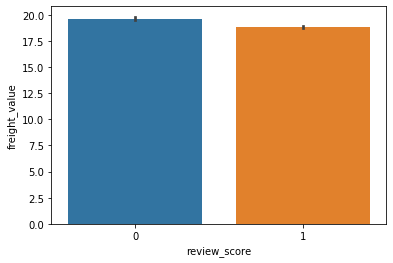

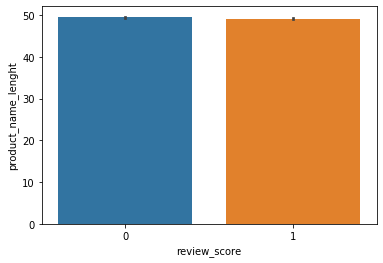

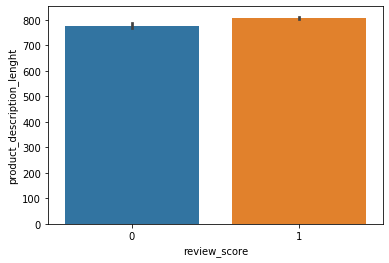

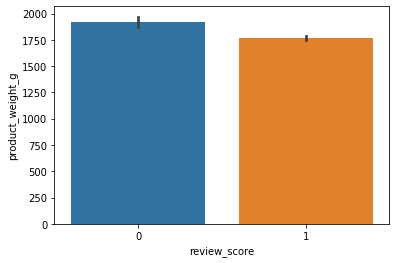

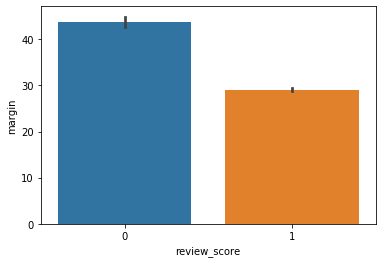

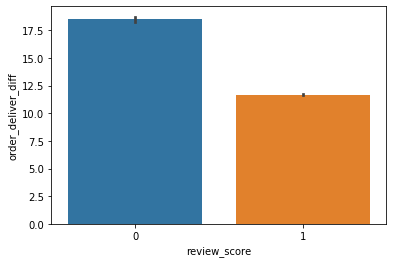

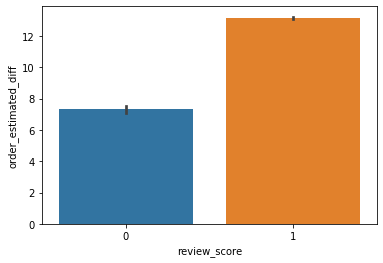

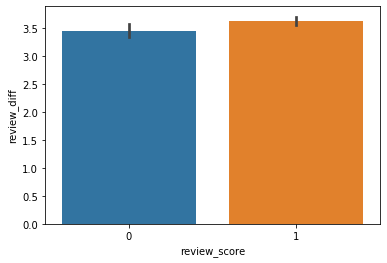

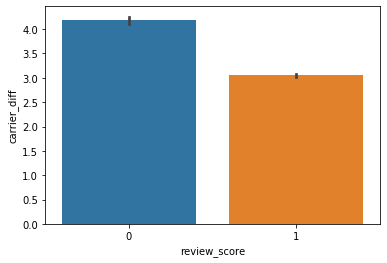

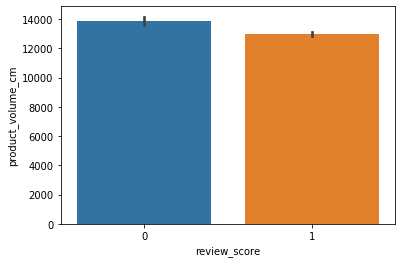

In [46]:
features = ['freight_value', 'product_name_lenght', 'product_description_lenght', 'product_weight_g',
            'margin', 'order_deliver_diff', 'order_estimated_diff', 'review_diff', 'carrier_diff', 'product_volume_cm']

for i in features:
  sns.barplot(x = df['review_score'], y = df[i]);
  plt.show()

**운임가격이 높은것이 약간 더 리뷰점수인식이 안좋다.**

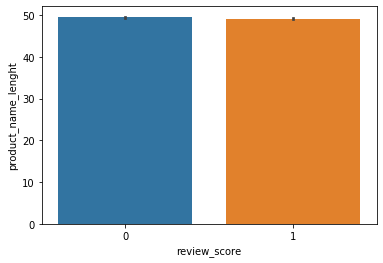

In [47]:
sns.barplot(x = df.review_score, y = df.product_name_lenght);

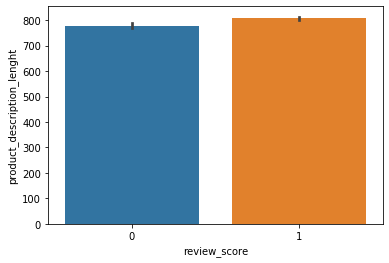

In [48]:
sns.barplot(x = df.review_score, y = df.product_description_lenght);

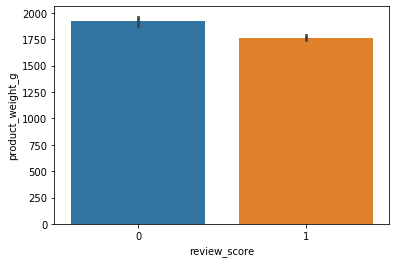

In [49]:
sns.barplot(x= df.review_score , y = df.product_weight_g);

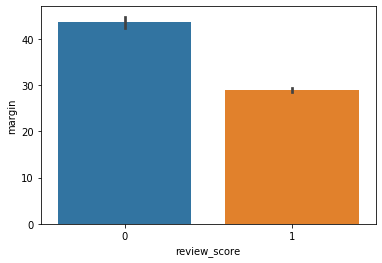

In [50]:
sns.barplot(x= df.review_score , y = df.margin);

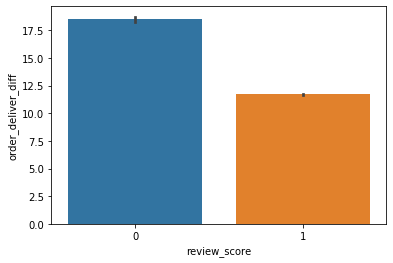

In [51]:
sns.barplot(x= df.review_score , y = df.order_deliver_diff);

**제품 주문과 제품 도착시간이 짧을수록 리뷰 점수가 낮다**

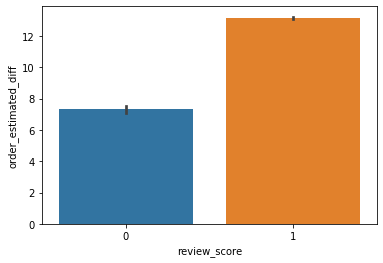

In [52]:
sns.barplot(x= df.review_score , y = df.order_estimated_diff);

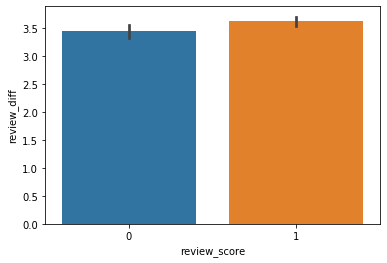

In [53]:
sns.barplot(x= df.review_score , y = df.review_diff);	

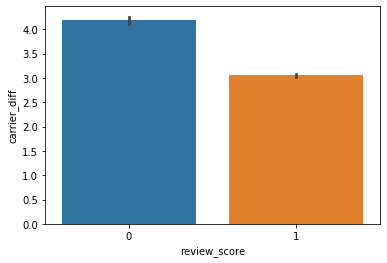

In [54]:
sns.barplot(x= df.review_score , y = df.carrier_diff);	

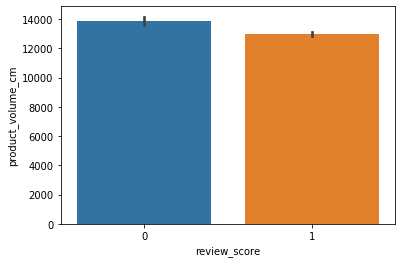

In [55]:
sns.barplot(x= df.review_score , y = df.product_volume_cm);	

**상품 부피가 큰것이 리뷰점수에 약간 낮게 영향을 준다.**

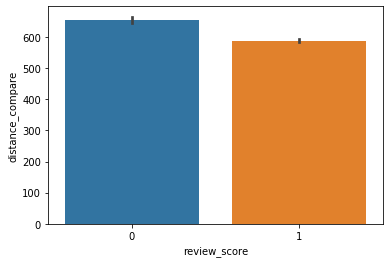

In [56]:
sns.barplot(x= df.review_score , y = df.distance_compare);	

**거리가 멀수록 리뷰점수가 낮다.**

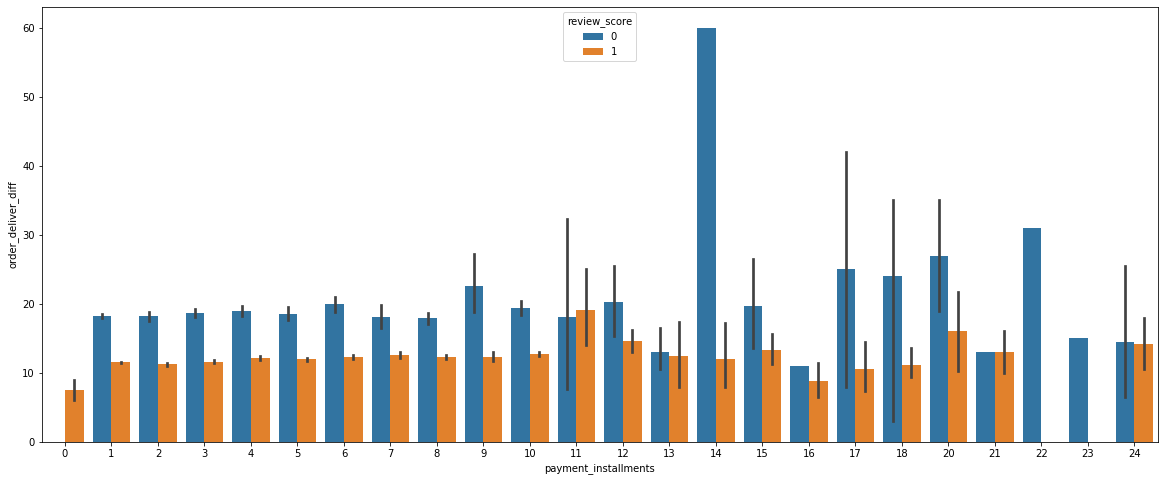

In [57]:
plt.figure(figsize = (20, 8))
sns.barplot(x = df.payment_installments, y = df.order_deliver_diff, hue = df.review_score);


**1. Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?**  
Ans) Data Leakage는 없고 방지하기위해서 위도/경도 거리를 구한뒤 위도/경도 열을 Drop하였습니다. 또한 Review Score에 1-5를 drop하고 컬럼 중복없이 0/1로 바꾸었습니다.


**2. 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?**  
Ans) 제품 주문과 제품 도착시간이 짧을수록 리뷰 점수가 낮다.  
운임가격이 높은것이 약간 더 리뷰점수인식이 안좋다.  
상품 부피가 큰것이 리뷰점수에 약간 낮게 영향을 준다.  
마진 값이 클수록 리뷰점수가 낮다.
제품 도착날짜와 주문날짜의 차이가.  
제품 승인 날짜와 제품 운반날짜가 길수록 리뷰 점수에 부정적이다.  


#**모델링 및 모델 해석**

In [58]:
# 모델링을 위해 id같은 고유값 drop
df = df.drop(['order_id', 'customer_id', 'customer_unique_id', 'review_id', 'product_id', 'seller_id'], axis = 1)

In [59]:
df.shape

(75622, 37)

In [60]:
df['order_purchase_timestamp'].min(), df['order_purchase_timestamp'].max()

(Timestamp('2016-10-03 09:44:50'), Timestamp('2018-08-29 15:00:37'))

In [61]:
df[df['order_purchase_timestamp'] > '2018-05-01'].shape, df[df['order_purchase_timestamp'] < '2018-05-01'].shape

((19600, 37), (56022, 37))

In [62]:
# 2018.05.01기준으로 Train/Test 나눔 비율 0.75 / 0.25
train = df[df['order_purchase_timestamp'] < '2018-05-01']
test = df[df['order_purchase_timestamp'] > '2018-05-01']

In [63]:
target = 'review_score'
X_test = test.drop(columns = target)
y_test = test[target]

**데이터 Leakage를 방지하기위해 훈련/검증셋으로도 나눔**

In [64]:
from sklearn.model_selection import train_test_split

X = train.drop(columns = target)
y = train[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, train_size=0.75, random_state= 42)

In [65]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((42016, 36), (14006, 36), (42016,), (14006,))

In [66]:
!pip install category_encoders

#**기준모델 선정**

In [68]:
def preprocess(df):
  def to_Timestamp(x):
      return x.timestamp()
  df.order_purchase_timestamp = df.order_purchase_timestamp.apply(to_Timestamp)
  df.order_approved_at = df.order_approved_at.apply(to_Timestamp)
  df.order_delivered_carrier_date = df.order_delivered_carrier_date.apply(to_Timestamp)
  df.order_delivered_customer_date = df.order_delivered_customer_date.apply(to_Timestamp)
  df.order_estimated_delivery_date = df.order_estimated_delivery_date.apply(to_Timestamp)
  df.review_creation_date = df.review_creation_date.apply(to_Timestamp)
  df.review_answer_timestamp = df.review_answer_timestamp.apply(to_Timestamp)
  df.shipping_limit_date = df.shipping_limit_date.apply(to_Timestamp)
  return df

In [ ]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [67]:
# 타겟 분포비율 확인
df['review_score'].value_counts(normalize = True)

1    0.784454
0    0.215546
Name: review_score, dtype: float64

**타겟분포가 1이 78.44%이므로 최빈값의 정확도보다는 logistic model 기본모델을 기준으로 세워서 f1점수 기준으로 기본모델 설정!**

**LogisticRegression**

In [70]:
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
np.seterr(divide='ignore', invalid='ignore')

column = ['order_status', 'customer_city', 'customer_state', 'payment_type', 'product_category_name', 'seller_city', 'seller_state']
pipe = make_pipeline(
    OneHotEncoder(cols = column,use_cat_names = True), 
    LogisticRegression(random_state = 42)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))
print('Val f1 score :',f1)

훈련 정확도:  0.8021706016755522
검증 정확도:  0.8098671997715264
Val f1 score : 0.8892769531412416


**기준모델(LogisticRegression)의 검증정확도 : 0.809, f1 : 0.889**

**Decision Tree**

In [71]:
# from sklearn.tree import DecisionTreeClassifier
# from category_encoders import OrdinalEncoder

# pipe1 = make_pipeline(
#     OrdinalEncoder(cols = column), 
#     DecisionTreeClassifier(random_state = 42, max_depth = 3)
# )

# pipe1.fit(X_train, y_train)
# y_pred = pipe1.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe1.score(X_train, y_train))
# print('검증 정확도: ', pipe1.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8118811881188119
검증 정확도:  0.8143652720262744
Val f1 score : 0.8913951545530493


**훈련 정확도:  0.8118811881188119  
검증 정확도:  0.8143652720262744  
Val f1 score : 0.8913951545530493**

**RandomForest**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from category_encoders import OrdinalEncoder

# pipe2 = make_pipeline(
#     OrdinalEncoder(cols = column), 
#     RandomForestClassifier(random_state = 42, max_depth = 3)
# )

# pipe2.fit(X_train, y_train)
# y_pred = pipe2.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe2.score(X_train, y_train))
# print('검증 정확도: ', pipe2.score(X_val, y_val))
# print('Val f1 score :',f1)

**훈련 정확도:  0.8085967250571211  
검증 정확도:  0.8138654862201914  
Val f1 score : 0.8917133956386293**

**AdaBoost**

In [73]:
# from sklearn.ensemble import AdaBoostClassifier

# pipe3 = make_pipeline(
#     OrdinalEncoder(),
#     AdaBoostClassifier(
#                     random_state=42
#                  )
# )
# pipe3.fit(X_train, y_train)
# y_pred = pipe3.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe3.score(X_train, y_train))
# print('검증 정확도: ', pipe3.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8127618050266565
검증 정확도:  0.814436669998572
Val f1 score : 0.8908579347415277


**훈련 정확도:  0.8127618050266565  
검증 정확도:  0.814436669998572  
Val f1 score : 0.8908579347415277**

**XGBoost**

In [74]:
from xgboost import XGBClassifier

pipe4 = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
                  random_state=42
                 )
)
pipe4.fit(X_train, y_train)
y_pred = pipe4.predict(X_val)
f1 = f1_score(y_val, y_pred)
print('훈련 정확도: ', pipe4.score(X_train, y_train))
print('검증 정확도: ', pipe4.score(X_val, y_val))
print('Val f1 score :',f1)

훈련 정확도:  0.8165222772277227
검증 정확도:  0.8160788233614166
Val f1 score : 0.8922265919169943


**XGBboost가 가장 높은 검증정확도가 나왔으로 XGB바탕으로 모델링 선택**

**Imputer는 앞에서 전처리로 처리하였기때문에 생략**

#**종류별 Encoder**  

**CatBoostEncoder  
GLMMEncoder(일반화 선형 혼합 모델 인코더)  
HelmertEncoder  
JamesSteinEncoder  
TargetEncoder  
BackwardDifferenceEncoder  
BaseNEncoder  
CountEncoder  
HashingEncoder  
HelmertEncoder  
JamesSteinEncoder  
LeaveOneOutEncoder  
MEstimateEncoder  
PolynomialEncoder  
SumEncoder  
WOEEncoder  
QuantileEncoder  
SummaryEncoder**

#**이상치 제거전 결과값**

**CatBoost Encoder**

In [75]:
# from category_encoders import CatBoostEncoder

# from xgboost import XGBClassifier

# pipe5 = make_pipeline(
#     CatBoostEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe5.fit(X_train, y_train)
# y_pred = pipe5.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe5.score(X_train, y_train))
# print('검증 정확도: ', pipe5.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8165757399883924  
검증 정확도:  0.815028901734104  
Val f1 score : 0.8910314269303357  

**GLMMEncoder(일반화 선형 혼합 모델 인코더)**

In [76]:
# from category_encoders import GLMMEncoder

# pipe6 = make_pipeline(
#     GLMMEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe6.fit(X_train, y_train)
# y_pred = pipe6.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe6.score(X_train, y_train))
# print('검증 정확도: ', pipe6.score(X_val, y_val))
# print('Val f1 score :',f1)

**HelmertEncoder**

In [77]:
# from category_encoders import HelmertEncoder

# pipe7 = make_pipeline(
#     HelmertEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe7.fit(X_train, y_train)
# y_pred = pipe7.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe7.score(X_train, y_train))
# print('검증 정확도: ', pipe7.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8165060940220545  
검증 정확도:  0.8146806880701999  
Val f1 score : 0.8908934355652137  

**JamesSteinEncoder**

In [78]:
# from category_encoders import JamesSteinEncoder

# pipe8 = make_pipeline(
#     JamesSteinEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe8.fit(X_train, y_train)
# y_pred = pipe8.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe8.score(X_train, y_train))
# print('검증 정확도: ', pipe8.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8255600696459663  
검증 정확도:  0.8041646354202939  
Val f1 score : 0.8838208560568501  

**TargetEncoder**

In [79]:
# from category_encoders import TargetEncoder

# pipe9 = make_pipeline(
#     TargetEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe9.fit(X_train, y_train)
# y_pred = pipe9.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe9.score(X_train, y_train))
# print('검증 정확도: ', pipe9.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8217295414973883  
검증 정확도:  0.8086217703182673  
Val f1 score : 0.8867644634910169

**BackwardDifferenceEncoder**

In [80]:
# from category_encoders import BackwardDifferenceEncoder

# pipe10 = make_pipeline(
#     BackwardDifferenceEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe10.fit(X_train, y_train)
# y_pred = pipe10.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe10.score(X_train, y_train))
# print('검증 정확도: ', pipe10.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8162971561230412  
검증 정확도:  0.8151681871996657  
Val f1 score : 0.8912027547757646

**BaseNEncoder**

In [81]:
# from category_encoders import BaseNEncoder

# pipe11 = make_pipeline(
#     BaseNEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe11.fit(X_train, y_train)
# y_pred = pipe11.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe11.score(X_train, y_train))
# print('검증 정확도: ', pipe11.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8164364480557168  
검증 정확도:  0.8148896162685424  
Val f1 score : 0.8909851529817078

**CountEncoder**

In [82]:
# from category_encoders import CountEncoder

# pipe12 = make_pipeline(
#     CountEncoder(cols = column),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe12.fit(X_train, y_train)
# y_pred = pipe12.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe12.score(X_train, y_train))
# print('검증 정확도: ', pipe12.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8161810795124782  
검증 정확도:  0.8155164008635699  
Val f1 score : 0.8913409081586612

**HashingEncoder**

In [83]:
# from category_encoders import HashingEncoder

# pipe13 = make_pipeline(
#     HashingEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe13.fit(X_train, y_train)
# y_pred = pipe13.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe13.score(X_train, y_train))
# print('검증 정확도: ', pipe13.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8159953569355775  
검증 정확도:  0.814611045337419  
Val f1 score : 0.8908210975309655

**LeaveOneOutEncoder**

In [84]:
# from category_encoders import LeaveOneOutEncoder

# pipe14 = make_pipeline(
#     LeaveOneOutEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe14.fit(X_train, y_train)
# y_pred = pipe14.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe14.score(X_train, y_train))
# print('검증 정확도: ', pipe14.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.7690539756239118  
검증 정확도:  0.7687164844348492  
Val f1 score : 0.8692365239988975

**MEstimateEncoder**

In [85]:
# from category_encoders import MEstimateEncoder

# pipe15 = make_pipeline(
#     MEstimateEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe15.fit(X_train, y_train)
# y_pred = pipe15.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe15.score(X_train, y_train))
# print('검증 정확도: ', pipe15.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8259547301218805  
검증 정확도:  0.8029110662302389  
Val f1 score : 0.8829514434609977  

**PolynomialEncoder**

In [86]:
# from category_encoders import PolynomialEncoder

# pipe16 = make_pipeline(
#     PolynomialEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe16.fit(X_train, y_train)
# y_pred = pipe16.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe16.score(X_train, y_train))
# print('검증 정확도: ', pipe16.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8167614625652931  
검증 정확도:  0.8148199735357615  
Val f1 score : 0.8909217705213932

**SumEncoder**

In [87]:
# from category_encoders import SumEncoder

# pipe17 = make_pipeline(
#     SumEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe17.fit(X_train, y_train)
# y_pred = pipe17.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe17.score(X_train, y_train))
# print('검증 정확도: ', pipe17.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.816598955310505  
검증 정확도:  0.815446758130789  
Val f1 score : 0.891304347826087

**WOEEncoder**

In [88]:
# from category_encoders import WOEEncoder

# pipe18 = make_pipeline(
#     WOEEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe18.fit(X_train, y_train)
# y_pred = pipe18.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe18.score(X_train, y_train))
# print('검증 정확도: ', pipe18.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8206384213580964  
검증 정확도:  0.8099449822411031  
Val f1 score : 0.8875149416759408

**QuantileEncoder**

In [89]:
# from category_encoders import QuantileEncoder

# pipe19 = make_pipeline(
#     QuantileEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe19.fit(X_train, y_train)
# y_pred = pipe19.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe19.score(X_train, y_train))
# print('검증 정확도: ', pipe19.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.82398142774231  
검증 정확도:  0.8070199874643081  
Val f1 score : 0.8854627371553756

**SummaryEncoder**

In [90]:
# from category_encoders import SummaryEncoder

# pipe20 = make_pipeline(
#     SummaryEncoder(),
#     XGBClassifier(
#                   random_state=42
#                  )
# )
# pipe20.fit(X_train, y_train)
# y_pred = pipe20.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# print('훈련 정확도: ', pipe20.score(X_train, y_train))
# print('검증 정확도: ', pipe20.score(X_val, y_val))
# print('Val f1 score :',f1)

훈련 정확도:  0.8245618107951248  
검증 정확도:  0.8060449892053764  
Val f1 score : 0.8849316200471016

**CountEncoder가 검증 정확도: 0.816 Val f1 score : 0.891로 가장 높게 나옴, 선택!**

#**최적의 하이퍼파라미터를 위해 RandomsearchCV사용**

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from category_encoders import CountEncoder
import warnings
warnings.filterwarnings('ignore')


eval_set = [(X_train, y_train),(X_val, y_val)]
pipe21 = make_pipeline(
    CountEncoder(),  
    XGBClassifier(random_state=42, n_jobs = -1, ealry_stopping_rounds = 30, 
                  eval_set = eval_set, eval_metrix = 'error', verbose = True)
)

dists = {
    'xgbclassifier__n_estimators': randint(100, 500),
    'xgbclassifier__max_depth': [-1,3,5,6,7,8], 
    'xgbclassifier__learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6], 
#    'xgbclassifier__eta' : randint(0,1),
#    'xgbclassifier__sub_sample' : randint(0.5,1),
#    'xgbclassifier__colsample_bytree': randint(0,1),
#    'xgbclassifier__lambda' : [1,1.5,2,2.5],
#    'xgbclassifier__alpha' : [0,1,2,3],
    'xgbclassifier__scale_pos_weight' : [3,3.1,3.2,3.3,3.4,3.5,3.6,4.2,4.5]
}

clf = RandomizedSearchCV(
    pipe21, 
    param_distributions=dists,
    random_state = 42,
    n_iter=30, 
    cv=5, 
    scoring='f1',
    n_jobs=-1,
)



clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
f1 = f1_score(y_val, y_pred)
print('훈련 정확도: ', clf.score(X_train, y_train))
print('검증 정확도: ', clf.score(X_val, y_val))
print('Val f1 score :',f1)

훈련 정확도:  0.8964356738565091
검증 정확도:  0.8929445435314612
Val f1 score : 0.8929445435314612


In [92]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1 : ', clf.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 132, 'xgbclassifier__scale_pos_weight': 3.6}
f1 :  0.8893155625236666


**최적 하이퍼파라미터:  {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 132, 'xgbclassifier__scale_pos_weight': 3.6}
f1 :  0.8893155625236666**

#**Test**

In [93]:
pipe22 = clf.best_estimator_
y_pred = pipe22.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('Test f1 score :',f1)

Test f1 score : 0.9092620589325956


**Test f1 score : 0.9092620589325956**

#**평가지표**

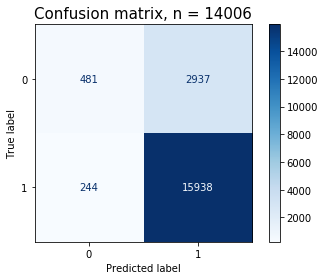

In [94]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.14      0.66      0.23       725
           1       0.98      0.84      0.91     18875

    accuracy                           0.84     19600
   macro avg       0.56      0.75      0.57     19600
weighted avg       0.95      0.84      0.88     19600



In [96]:
from sklearn.metrics import roc_curve

y_pred_proba = clf.predict_proba(X_test)[:, 1]
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.986820
1,0.000000,0.000062,0.986820
2,0.000000,0.001607,0.981390
3,0.000293,0.001607,0.981384
4,0.000293,0.002101,0.980313
...,...,...,...
5355,0.997074,0.999876,0.033327
5356,0.997074,0.999938,0.032980
5357,0.998537,0.999938,0.026875
5358,0.998537,1.000000,0.024975


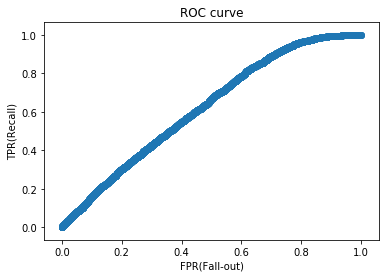

In [97]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [98]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score

0.6232572976395838

#**여러 수치적 지표 및 permutation importance, pdp, shap등**

#**permutation**

In [99]:
clf.best_params_

{'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 6,
 'xgbclassifier__n_estimators': 132,
 'xgbclassifier__scale_pos_weight': 3.6}

In [100]:
from sklearn.pipeline import Pipeline

eval_set = [(X_train, y_train),(X_test, y_test)]
pipe = Pipeline([
    ('preprocessing', make_pipeline(CountEncoder())),
    ('xgb', XGBClassifier(random_state=42, n_jobs = -1, ealry_stopping_rounds = 30, 
                  eval_set = eval_set, eval_metrix = 'error', verbose = True)) 
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('countencoder',
                                  CountEncoder(cols=['order_status',
                                                     'customer_city',
                                                     'customer_state',
                                                     'payment_type',
                                                     'product_category_name',
                                                     'seller_city',
                                                     'seller_state'],
                                               combine_min_nan_groups=True))])),
                ('xgb',
                 XGBClassifier(ealry_stopping_rounds=30, eval_metrix='error',
                               eval_set=[(      order_status  order_purchase_timestamp  ord...
77514                    14            1            13   64.47   
77519                    14            1             1   24.06   
77524      

In [101]:
pip install eli5

In [102]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['xgb'], # model
    scoring='f1', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)

X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)
permuter.fit(X_test_transformed, y_test);

In [103]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

freight_value                   -0.000292
customer_zip_code_prefix        -0.000172
payment_installments            -0.000106
seller_zip_code_prefix          -0.000082
product_category_name           -0.000059
product_length_cm               -0.000034
price                           -0.000030
product_width_cm                -0.000030
product_weight_g                -0.000028
product_photos_qty              -0.000011
seller_state                    -0.000006
order_delivered_customer_date   -0.000006
distance_compare                -0.000005
customer_state                  -0.000004
shipping_limit_date              0.000000
order_status                     0.000000
payment_type                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000000
order_delivered_carrier_date     0.000000
review_creation_date             0.000000
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
product_height_cm                0

In [104]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0168 ± 0.0009,order_estimated_diff
0.0007 ± 0.0005,margin
0.0002 ± 0.0005,order_deliver_diff
0.0002 ± 0.0004,review_diff
0.0002 ± 0.0001,product_description_lenght
0.0001 ± 0.0003,customer_city
0.0001 ± 0.0001,carrier_diff
0.0001 ± 0.0001,payment_value
0.0000 ± 0.0001,product_name_lenght
0.0000 ± 0.0000,review_answer_timestamp


**Partial Dependence Plots(PDP)**

In [105]:
pip install pdpbox

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


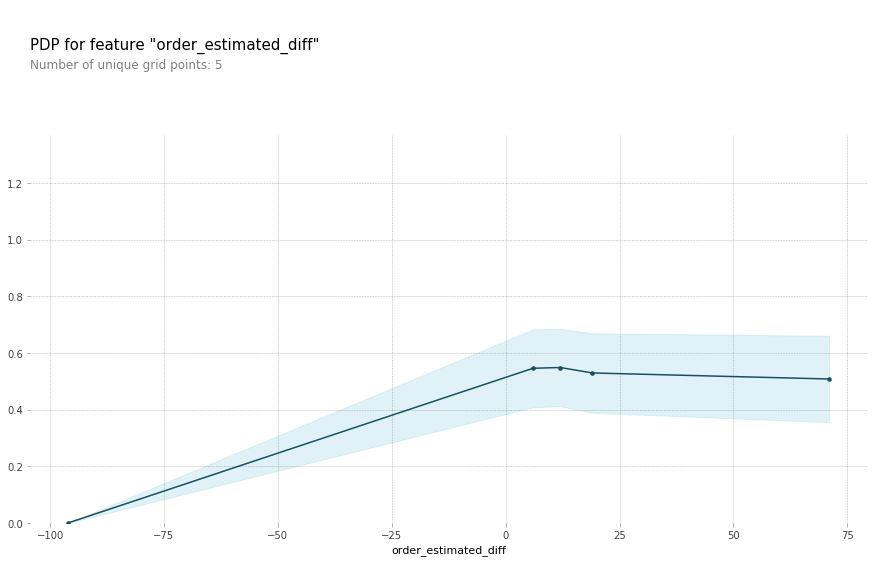

In [106]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'order_estimated_diff'

isolated = pdp_isolate(
    model=clf, 
    dataset=X_test_transformed, 
    model_features=X_test_transformed.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=5, # default=10
)
pdp_plot(isolated, feature_name=feature);

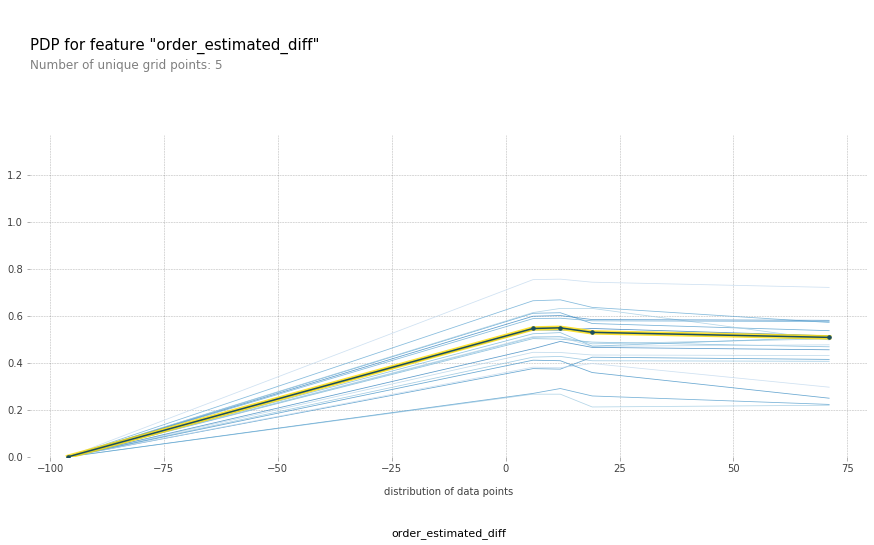

In [107]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

plt.xlim(2000,15000);

In [108]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot


features = ['margin', 'order_deliver_diff']

interaction = pdp_interact(
    model=clf, 
    dataset=X_test_transformed,
    model_features=X_test_transformed.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


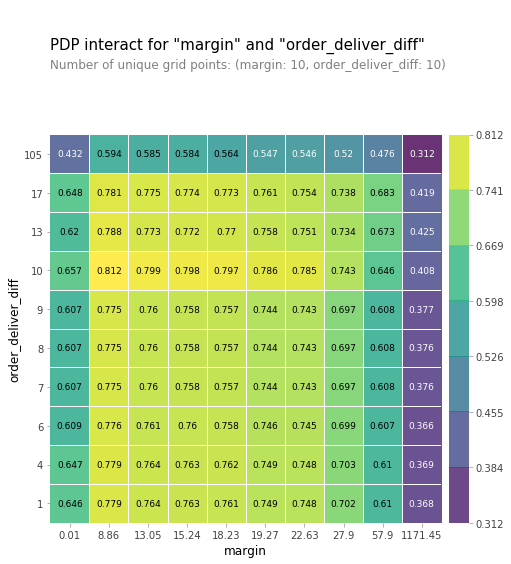

In [109]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [110]:
pip install shap

**shap**

In [111]:
model = XGBClassifier(random_state=42, n_jobs = -1).fit(X_train, y_train)

ValueError: ignored

In [ ]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test.iloc[:100])

row = X_test.iloc[[1]]

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300])